## Dataset
#### Allen Institute for Brain Science: Visual Coding - Neuropixels

© 2015 Allen Institute for Brain Science. Allen Brain Atlas API. Available from: https://portal.brain-map.org/explore/circuits/visual-coding-neuropixels).

## Analyze running wheel data
goal: segment data epochs based on behavioral state

##### Imports

In [1]:
# imports
from os.path import join

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import resample

from allensdk.brain_observatory.ecephys.ecephys_project_cache import EcephysProjectCache

##### Set up project 

In [2]:
# set manifest path and load project cache
MANIFEST_PATH = '/micha/visual_encoding/ecephys_cache_dir/'
project_cache = EcephysProjectCache.from_warehouse(manifest=join(MANIFEST_PATH, "manifest.json"))

##### Load data

In [3]:
# Select (and download) data for an example session
SESSION_ID = 791319847
session = project_cache.get_session_data(SESSION_ID)

In [4]:
# unpack running wheel data
data = session.running_speed
speed = data['velocity'].values
t_start = data['start_time'].values
t_end = data['end_time'].values

##### plot running speed on different timescales

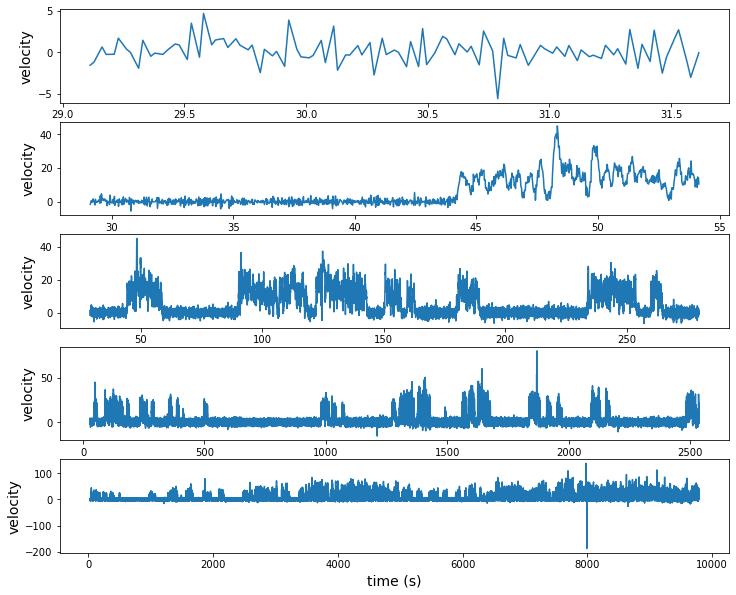

In [5]:
n_scales = int(np.floor(np.log10(len(speed))))
t = t_start

fig, axes = plt.subplots(n_scales,1, figsize=(12,n_scales*2))
for ii, ax in enumerate(axes):
    i_scale = ii+2
    ax.plot(t[:10**i_scale], speed[:10**i_scale])
    ax.set_xlabel('time (s)', fontsize=14)
    ax.set_ylabel('velocity', fontsize=14)

##### plot running speed over recorded intervals

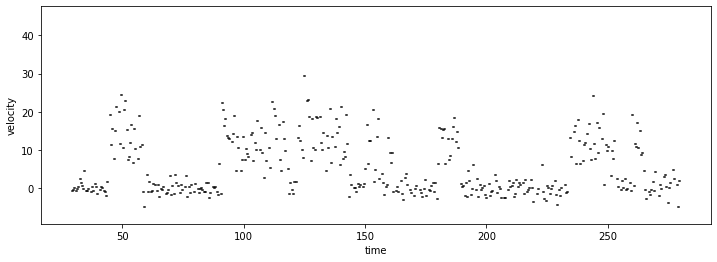

In [6]:
# number of samples to plot
N_SAMPLES = 10000

# plot
fig, ax = plt.subplots(figsize=(12,4))
for ii in range(N_SAMPLES):
    ax.plot([t_start[ii], t_end[ii]], [speed[ii], speed[ii]], color='k')
ax.set_xlabel('time')
ax.set_ylabel('velocity');

##### plot histogram of running speed

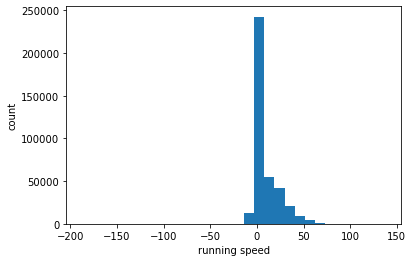

In [7]:
fig, ax = plt.subplots()
ax.hist(speed,30)
ax.set_xlabel('running speed')
ax.set_ylabel('count');

##### downsample running speed data